In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os

2024-07-04 16:41:35.614165: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 16:41:35.616689: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 16:41:35.622479: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 16:41:35.643560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 16:41:35.683667: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [3]:
gpus=tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
data_dir='data'
# loop over all the images
os.listdir(os.path.join(data_dir,'happy'))

['very-happy-people.jpg',
 'maxresdefault2.jpg',
 'happy-people-group-fb.jpg',
 'image26.jpeg',
 'maxresdefault.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'image22.jpeg',
 'image9.jpeg',
 '1920px-face-smile.svg_.png',
 'image27.jpeg',
 'hology-happy-people-young-woman-running-multicolored-balloons-beach-71974216.jpg',
 'group-young-happy-people-with-their-hands-up_369728-62.jpg',
 'images.jpg',
 'happy-people2.jpg',
 'aa-happy-people.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'images3.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'happy-people.png',
 'web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620857-unsplash.jpg',
 'friends-happy-190821-1490x838.jpg',
 'MV5BZjYwNTc1M2MtM2YxMi00YzYyLTkxY2ItY2I3OWE3NDBmNDVmXkEyXkFqcGdeQXVyMjkwOTAyMDU._V1_.jpg',
 'image14.jpeg',
 'Successful-year.jpg',
 'nm-how-happiness-affects-health-tnail.jpg',
 'Happy_guy.jpg',
 'freedom-serenity-concept-female-model-ecstatic-e

In [5]:
# import open cv and imghdr to clean images
import cv2 
import imghdr # checks extensions of each image
from matplotlib import pyplot as plt
image_exts=['jpeg','jpg','bmp','png']


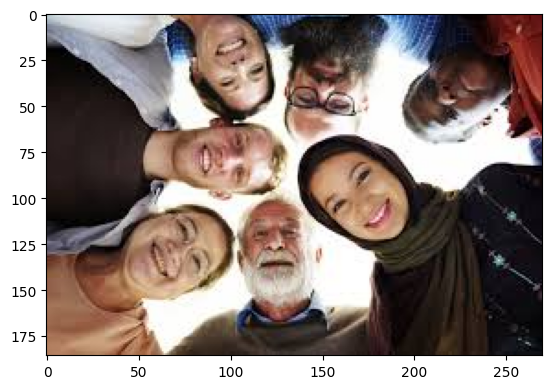

In [6]:
#open image using opencv(cv2)
img=cv2.imread(os.path.join('data','happy','images2.jpg'))
#img has image in form of numpy arrays

# opencv reads in BGR while pyplot expects rgb. 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
#script to remove images with other extensions
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in exts list: {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

# Loading the data using keras

In [8]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)
# can set the batch size and other paramers
# it pre process the data and resizes them as well
# labels are also assigned automatically]

Found 176 files belonging to 2 classes.


In [9]:
data_iterator=data.as_numpy_iterator()
#gives next batch
batch=data_iterator.next()
print(type(data))


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [10]:
import numpy as np

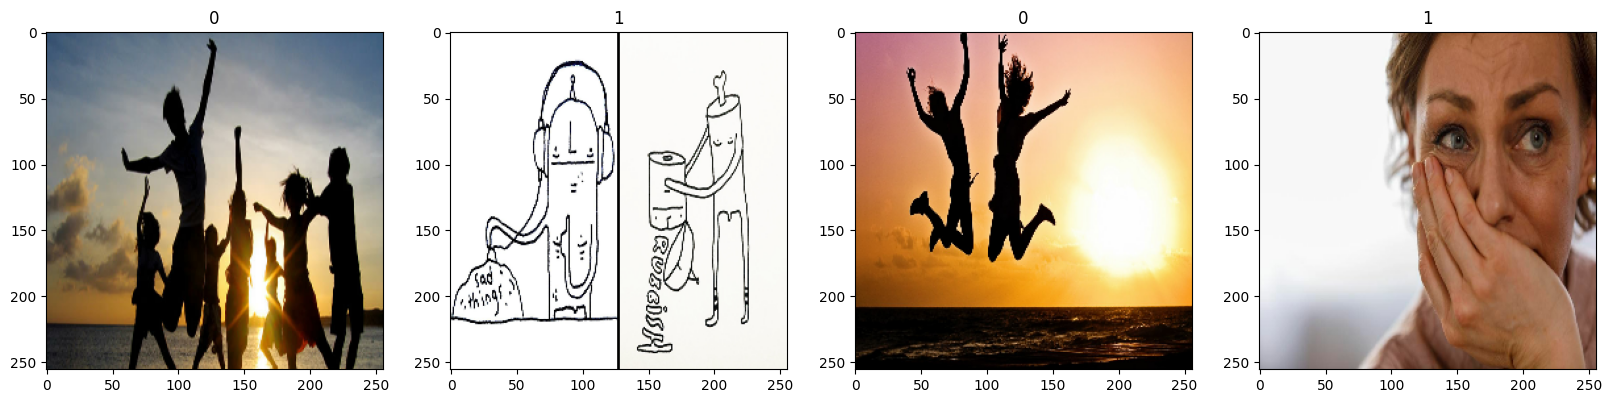

In [11]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# 0 is Happy
# 1 is Sad

# Preprocessing Data

In [12]:
# sacle data between 0 and 1
data=data.map(lambda x,y:(x/255,y))

# split in train,dev and test sets



In [13]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()
print(batch[0].max())
# always check

1.0


In [14]:
# split data
len(data)
train_size=int(len(data)*0.70)
val_size=int(len(data)*0.20)
test_size=int(len(data)*0.10)+1
print(train_size)
print(val_size)
print(test_size)

4
1
1


In [15]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

print(type(data))

<class 'tensorflow.python.data.ops.map_op._MapDataset'>


# Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [23]:
model=Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add()